In [1]:
import pandas
sample = pandas.read_csv("./Stroop-effect-data.csv")
sample

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


# 描述统计分析

In [26]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [16]:
# 样本标准差：标准误差
congruent_std = sample['Congruent'].std()
incongruent_std = sample['Incongruent'].std()
# 样本均值
congruent_mean = sample['Congruent'].mean()
incongruent_mean = sample['Incongruent'].mean()
print('the std of Group Congruent is %d'%congruent_std)
print('the mean of Group Congruent is %d'%congruent_mean)
print('the std of Group Incongruent is %d'%incongruent_std)
print('the mean of Group Incongruent is %d'%incongruent_mean)

the std of Group Congruent is 3
the mean of Group Congruent is 13
the std of Group Incongruent is 5
the mean of Group Incongruent is 22


In [4]:
sample.dtypes

Congruent      float64
Incongruent    float64
dtype: object

# 自变量与因变量

在Stroop Effect Test 里，自变量是单词颜色与词义是否一致，有两种值，即 单词颜色与词义一致 congruent 与 单词颜色与词义不一致 incongruent.
而因变量则是每次测试花费的时间time

# 可视化 —— 分布图
由图可知，两组数据分别近似正态分布，可以采用t检验

C:\Users\Sonny\Anaconda3\envs\py3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


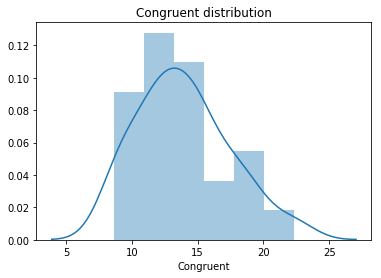

C:\Users\Sonny\Anaconda3\envs\py3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


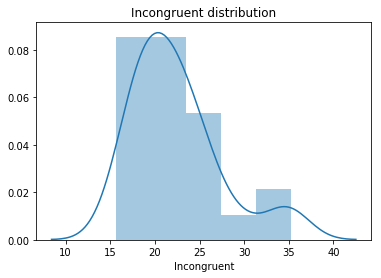

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(sample['Congruent'])
plt.title("Congruent distribution")
plt.show()

sns.distplot(sample['Incongruent'])
plt.title("Incongruent distribution")
plt.show()

# 置信区间
案例中，我们关心的是两组样本分别对应的总体是否相等，进一步，可以观察判断两组样本的均值差与 0 是否有显著差异。

In [20]:
dif = sample['Incongruent']-sample['Congruent']
print(dif.mean(),dif.std())

8.423875 5.102036859346514


In [21]:
dif_t, dif_p_two, dif_df=st.ttest_ind(sample['Congruent'],sample['Incongruent'], usevar='pooled')
print(dif_t, dif_p_two, dif_df)

-6.726963373958576 2.3419703987931682e-08 46.0


In [49]:
#判断标准（显著水平）使用alpha=5%
# 根据t分布表，alpha = 0.05,双尾检验，自由度为23，对应 t_alpha = 2.069
alpha=float(0.05)
congruent_std=congruent_std.astype('int')
incongruent_st=incongruent_std.astype('int')
margin_of_error = 2.069*(((congruent_std**2)+(incongruent_std**2))/24)**0.5
print(margin_of_error)

2.4663038928112457


In [50]:
up_dif = dif.mean()+margin_of_error
down_dif = dif.mean()-margin_of_error
print("所以数据置信区间是%f - %f,显著水平为%f"%(up_dif, down_dif, alpha))

所以数据置信区间是10.890179 - 5.957571,显著水平为0.050000


# 假设检验
由于数据是由同一组人进行了两次，此抽样方法得到的数据属于“匹配样本”，这里就使用相关配对检验。
# 零假设与备择假设
dif
设零假设H0: dif=0，用统计学语言来说就是：两个样本组的总体均值有显著差异

备择假设Ha: dif!=0 即两个样本组的总体均值无显著差异。

# t检验

In [51]:
from scipy import stats
t,p_two=stats.ttest_rel(sample['Congruent'],sample['Incongruent'])
print('t=',t,'p_two=',p_two)
p_one_tail = p_two/2

t= -8.088610872807587 p_two= 3.548719149724915e-08



# 推断统计过程

In [52]:
#判断标准（显著水平）使用alpha=5%
alpha=0.05
#决策
if(t<0 and p_one_tail<alpha):
    print('拒绝零假设，有统计显著')
    print('也就是接受备选假设：特鲁普效应存在')
else :
    print('接受零假设，没有统计显著，特鲁普效应不存在')

拒绝零假设，有统计显著
也就是接受备选假设：特鲁普效应存在
